
# Linear and Random Forest Regression On House Pricing 

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Linear Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section402)<br>
    - 4.2 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.3 [Linear regression in scikit-learn](#section404)<br>
    - 4.4 [Using the Model for Prediction](#section405)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
    - 5.3 [Model Evaluation using RMSE with GridSearch.](#section503)<br>
6. [Random Forest](#section6)<br>
    - 6.1 [Model evaluation using metrics](#section601)<br>

## 1. Problem Statement

The goal is to build a model which predict the __Price of Houses__ with the help of __81 features__.

## 2. Data Loading and Description
<img src="https://cdn-images-1.medium.com/max/1055/1*2foyXif7hwkO8wWB5T9KtQ.png?raw=true" width="1366" height="768"/> 

- The dataset comprises of __1460 observations of 81 columns__. Below is a table showing names of all the columns and their description. 

| Column Name         | Description                                               |
| ------------------  |:---------------------------------------------------------:| 
| SalePrice           | The property's sale price in dollars.                     |                   
| MSSubClass          | The building class                                        |
| MSZoning            | The general zoning classification                         |
| LotFrontage         | Linear feet of street connected to property               |
| LotArea             | Lot size in square feet                                   |
| Street              | Type of road access                                       |
| Alley               | Type of alley access                                      |
| LotShape            | General shape of property                                 |
| LandContour         | Flatness of the property                                  |
| Utilities           | Type of utilities available                               |
| LotConfig           | Lot configuration                                         |
| LandSlope           | Slope of property                                         |
| Neighborhood        | Physical locations within Ames city limits                |
| Condition1          | Proximity to main road or railroad                        |
| Condition2          | Proximity to main road or railroad(if a second is present)|
| BldgType            | Type of dwelling                                          |
| HouseStyle          | Style of dwelling                                         |
| OverallQual         | Overall material and finish quality                       |
| OverallCond         | Overall condition rating                                  |
| YearBuilt           | Original construction date                                |
| YearRemodAdd        | Remodel date                                              |
| RoofStyle           | Type of roof                                              |
| RoofMatl            | Roof material                                             |
| Exterior1st         | Exterior covering on house                                |
| Exterior2nd         | Exterior covering on house (if more than one material)    |
| MasVnrType          | Masonry veneer type                                       |
| MasVnrArea          | Masonry veneer area in square feet                        |
| ExterQual           | Exterior material quality                                 |
| ExterCond           | Present condition of the material on the exterior         |
| Foundation          | Type of foundation                                        |
| BsmtQual            | Height of the basement                                    |
| BsmtCond            | General condition of the basement                         |
| BsmtExposure        | Walkout or garden level basement walls                    |
| BsmtFinType1        | Quality of basement finished area                         |
| BsmtFinSF1          | Type 1 finished square feet                               |
| BsmtFinType2        | Quality of second finished area (if present)              |
| BsmtFinSF2          | Type 2 finished square feet                               |
| BsmtUnfSF           | Unfinished square feet of basement area                   |
| TotalBsmtSF         | Total square feet of basement area                        |
| Heating             | Type of heating                                           |
| HeatingQC           | Heating quality and condition                             |
| CentralAir          | Central air conditioning                                  |
| Electrical          | Electrical system                                         |
| 1stFlrSF            | First Floor square feet                                   |
| 2ndFlrSF            | Second floor square feet                                  |
| LowQualFinSF        | Low quality finished square feet (all floors)             |
| GrLivArea           | Above grade (ground) living area square feet              |
| BsmtFullBath        | Basement full bathrooms                                   |
| BsmtHalfBath        | Basement half bathrooms                                   |  
| FullBath            | Full bathrooms above grade                                |
| HalfBath            | Half baths above grade                                    |
| Bedroom             | Number of bedrooms above basement level                   |
| Kitchen             | Number of kitchens                                        | 
| KitchenQual         | Kitchen quality                                           |
| TotRmsAbvGrd        | Total rooms above grade (does not include bathrooms)      |
| Functional          | Home functionality rating                                 |
| Fireplaces          | Number of fireplaces                                      |
| FireplaceQu         | Fireplace quality                                         |
| GarageType          | Garage location                                           |
| GarageYrBlt         | Year garage was built                                     |
| GarageFinish        | Interior finish of the garage                             |
| GarageCars          | Size of garage in car capacity                            |
| GarageArea          |   Size of garage in square feet                           |
| GarageQual          | Garage quality                                            |
| GarageCond          | Garage condition                                          |
| PavedDrive          | Paved driveway                                            |
| WoodDeckSF          | Wood deck area in square feet                             |
| OpenPorchSF         | Open porch area in square feet                            |
| EnclosedPorch       | Enclosed porch area in square feet                        |
| 3SsnPorch           | Three season porch area in square feet                    |
| ScreenPorch         | Screen porch area in square feet                          |
| PoolArea            | Pool area in square feet                                  |
| PoolQC              | Pool quality                                              |
| Fence               | Fence quality                                             |
| MiscFeature         | Miscellaneous feature not covered in other categories     |
| MiscVal             | $Value of miscellaneous feature                           |
| MoSold              | Month Sold                                                |
| YrSold              | Year Sold                                                 |
| SaleType            | Type of sale                                              |
| SaleCondition       | Condition of sale                                         |

__Importing Packages__

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn import metrics
from scipy import stats
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [73]:
house_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv") 

## 3. Exploratory Data Analysis

In [74]:
house_data.shape

(1460, 81)

In [75]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [77]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [78]:
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [79]:
profile = pandas_profiling.ProfileReport(house_data)
profile.to_file(outputfile="myoutputfile.html") 

/home/kundan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

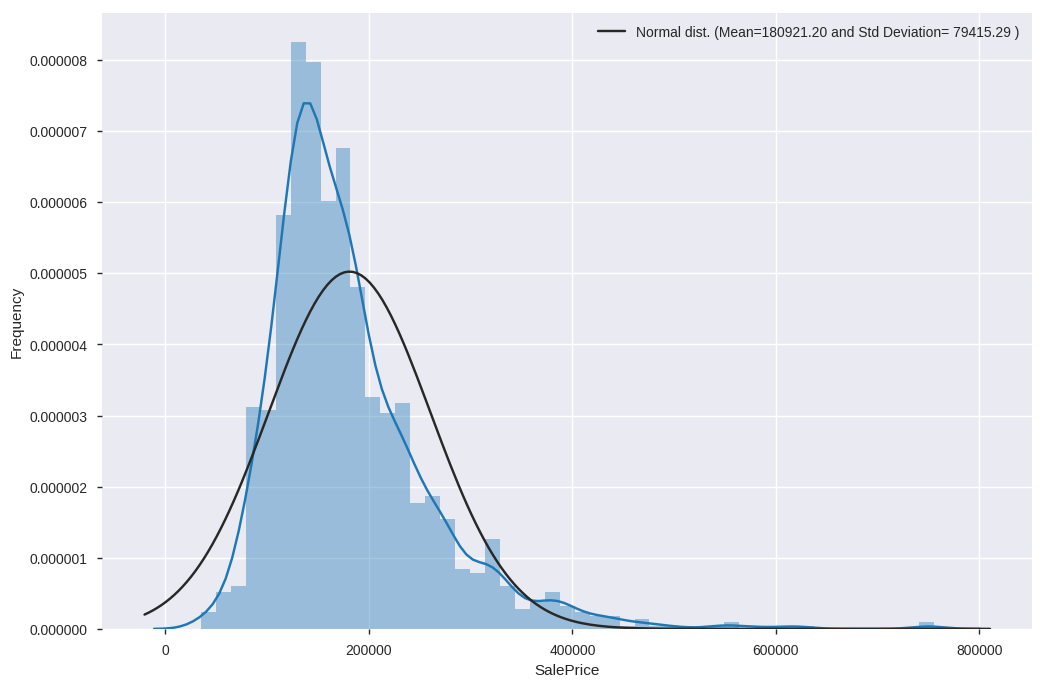

In [80]:
plt.subplots(figsize=(12,8))
sns.distplot(house_data['SalePrice'],fit=stats.norm)
(mean, std) = stats.norm.fit(house_data['SalePrice'])
# plot with the distribution

plt.legend(['Normal dist. (Mean={:.2f} and Std Deviation= {:.2f} )'.format(mean, std)], loc='best')
plt.ylabel('Frequency')

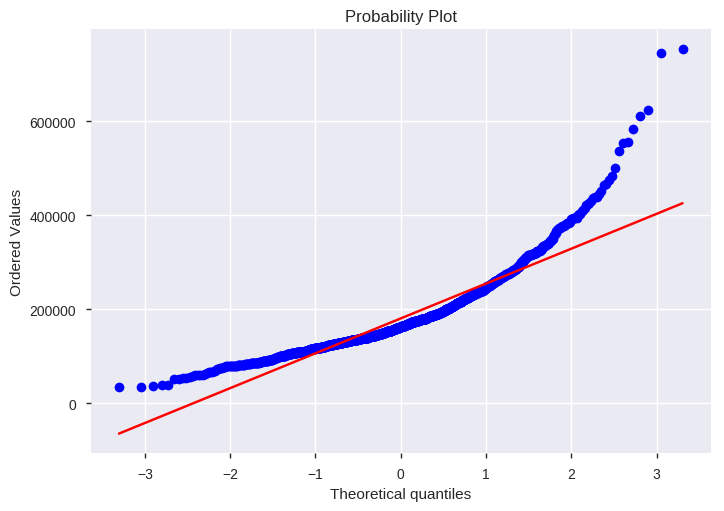

In [81]:
# Probability plot
fig = plt.figure()
stats.probplot(house_data['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

we use log transformation for target variable to make it normal distribution

In [82]:
# we use log function which is in numpy
house_data['SalePrice'] = np.log1p(house_data['SalePrice'])

/home/kundan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

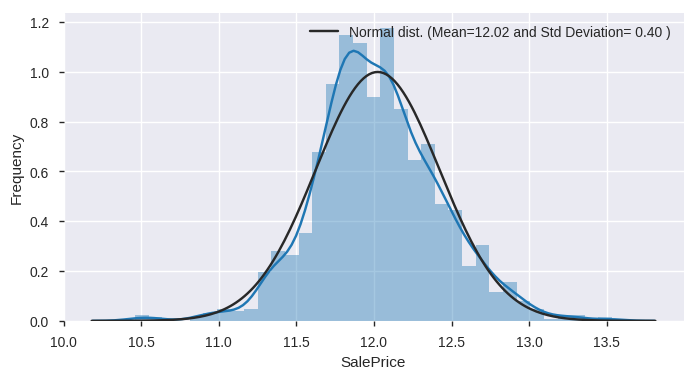

In [83]:
# After log transformation checking normal distribution
plt.subplots(figsize=(8,4))
sns.distplot(house_data['SalePrice'],fit=stats.norm)
(mean, std) = stats.norm.fit(house_data['SalePrice'])
# plot with the distribution

plt.legend(['Normal dist. (Mean={:.2f} and Std Deviation= {:.2f} )'.format(mean, std)], loc='best')
plt.ylabel('Frequency')

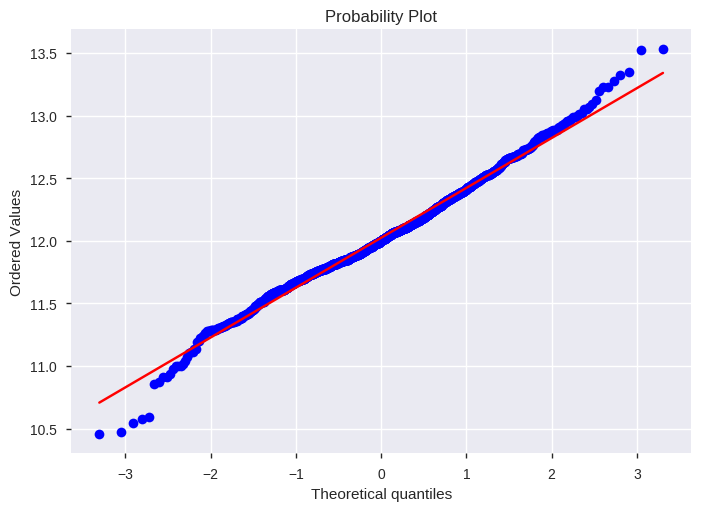

In [84]:
# Probability Plot
fig = plt.figure()
stats.probplot(house_data['SalePrice'], plot=plt)
plt.show()

In [85]:
# check the missing values columns
house_data.columns[house_data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

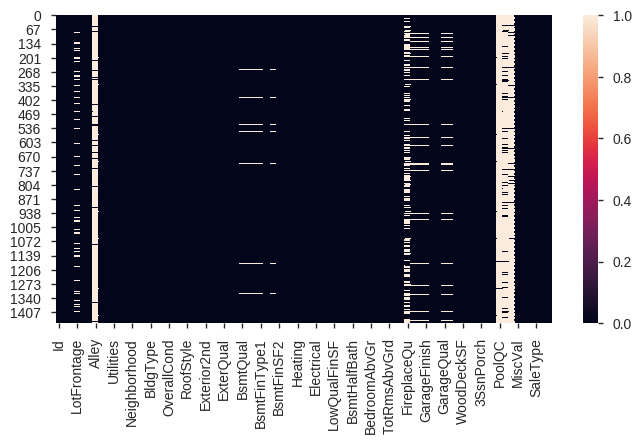

In [86]:
# Plotting missing value attributes
plt.figure(figsize=(8, 4))
sns.heatmap(house_data.isnull())
plt.show()

In [87]:
#count the missing values in each of these columns
Isnull = house_data.isnull().sum()/len(house_data)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Visualize the missing values uing Bar Plot.

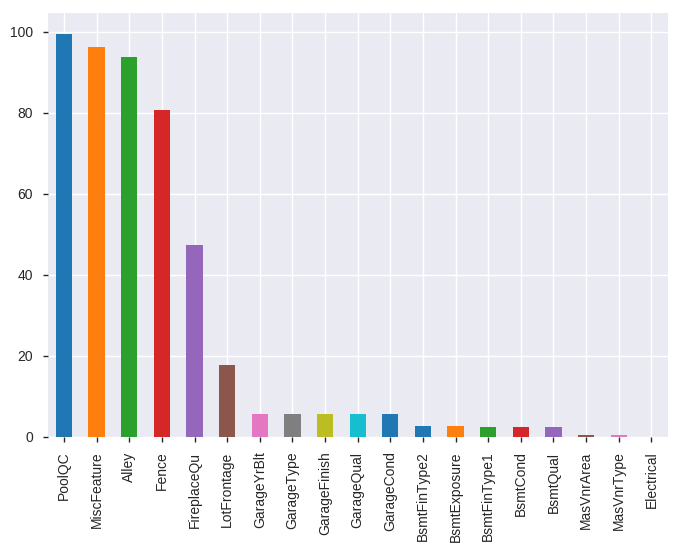

In [88]:
Isnull.plot.bar()

### Correlation Between Numeric attributes for House Data

In [89]:
# select only numeric columns from house data
#there is 38 numerical attribute from 81 attributes
house_data_corr = house_data.select_dtypes(include=[np.number])

In [90]:
house_data_corr.shape

(1460, 38)

In [91]:
#Delete Id because that is not need for corralation plot
del house_data_corr['Id']

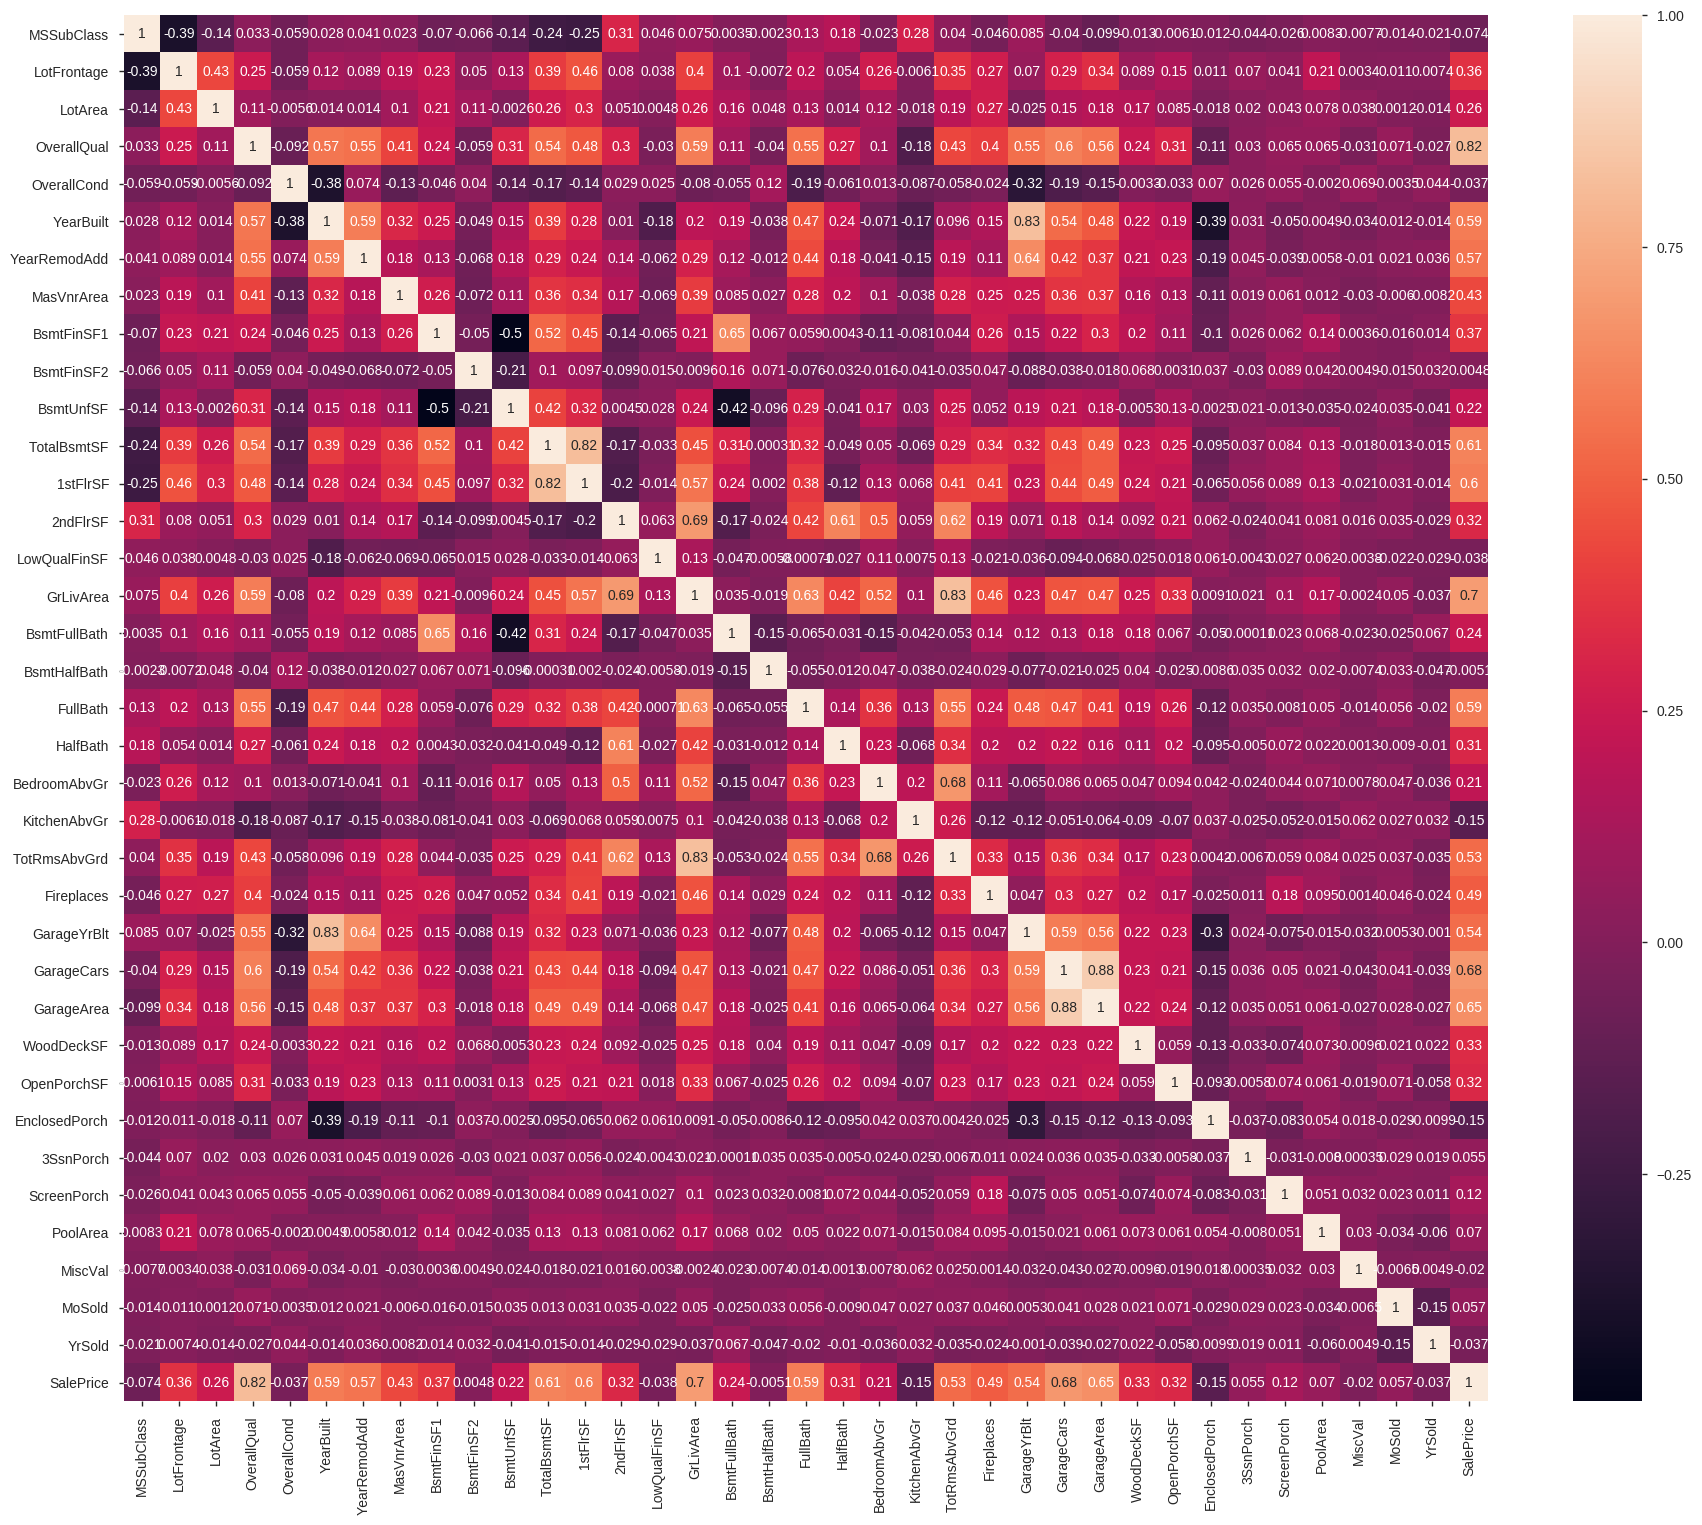

In [92]:
#Coralation plot
corr = house_data_corr.corr()
plt.subplots(figsize=(22,18))
sns.heatmap(corr, annot=True)

### Top 50% correlation house attributes with sales price

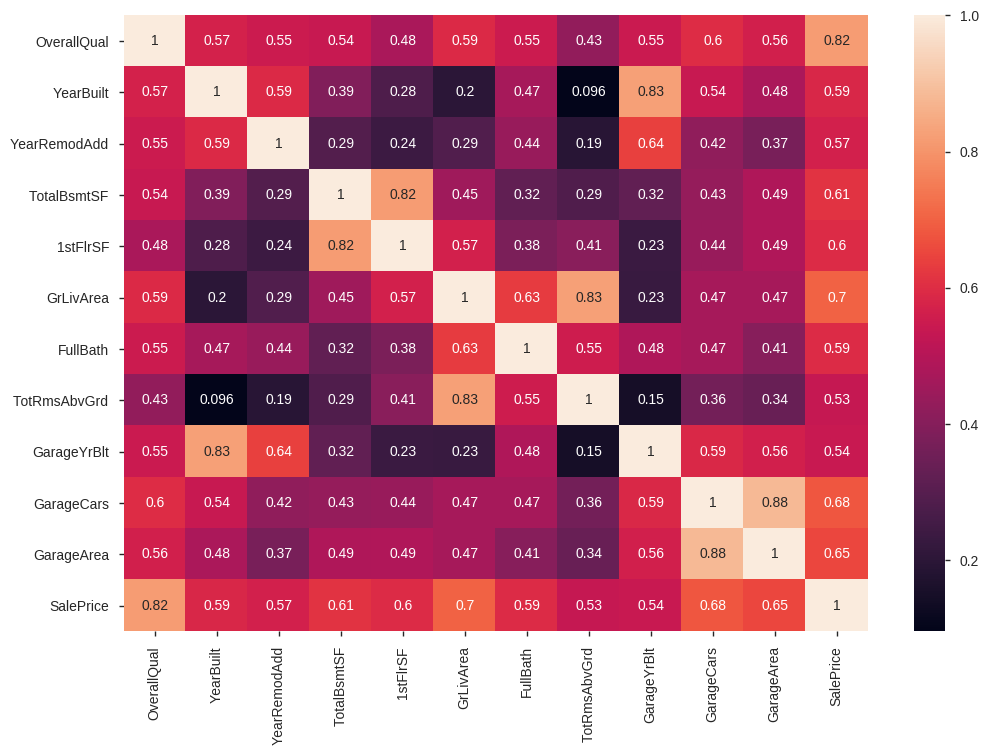

In [93]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = house_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

### OverallQual is highly correlated with target feature of saleprice by 82%

In [94]:
#unique value of OverallQual
house_data.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

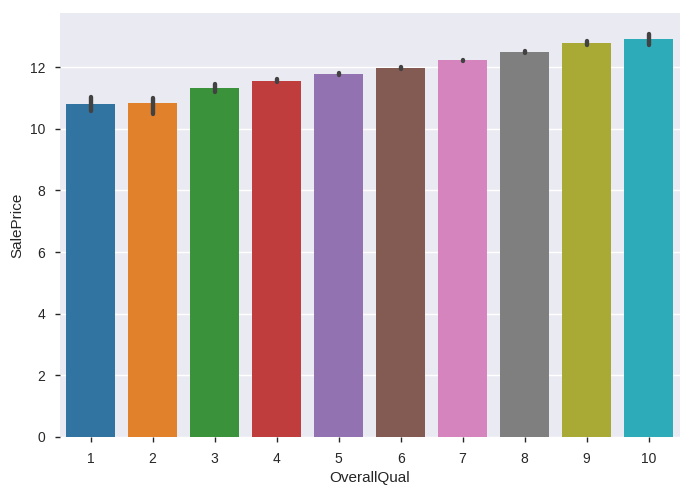

In [95]:
sns.barplot(house_data.OverallQual,house_data.SalePrice)

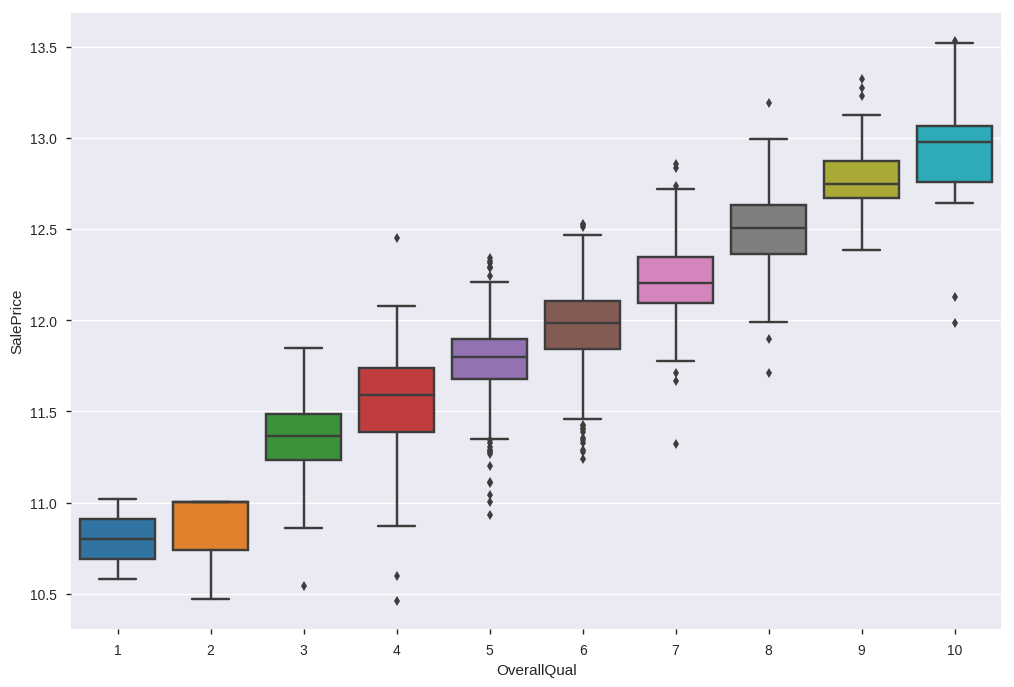

In [96]:
# Box Plot Representation
plt.subplots(figsize=(12,8))
sns.boxplot(x=house_data.OverallQual,y=house_data.SalePrice)

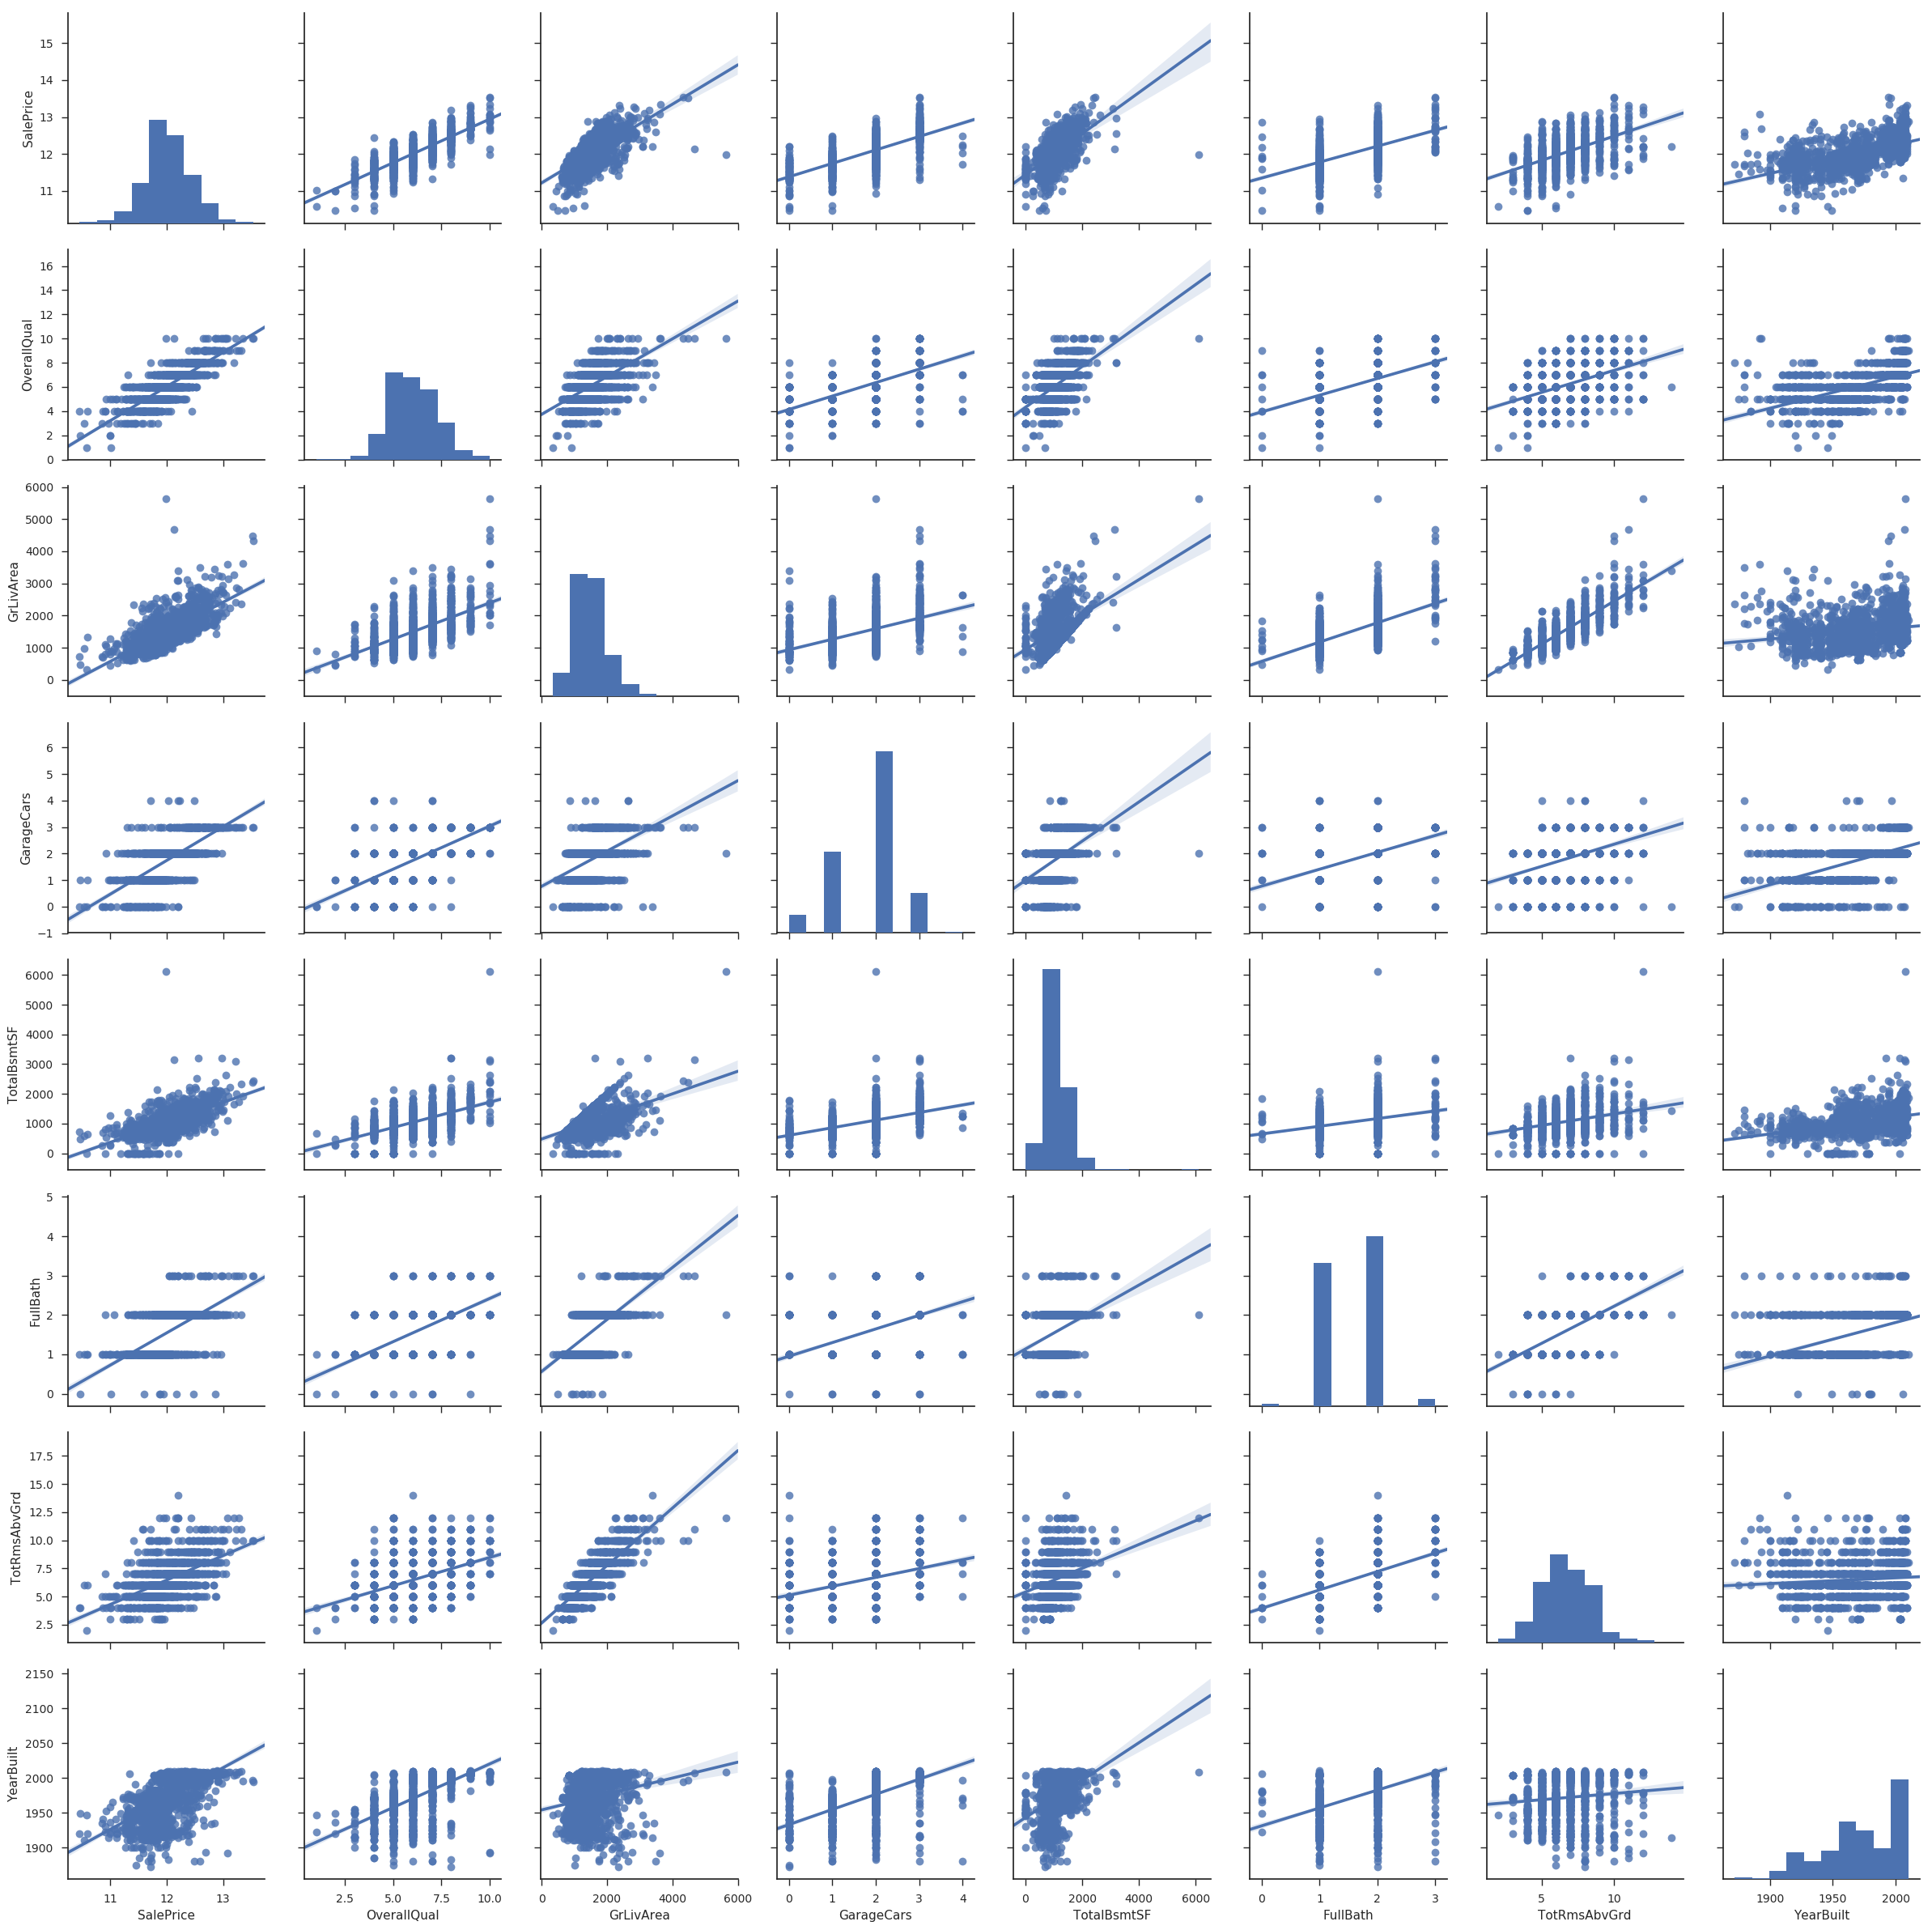

In [97]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(house_data[col], size=3, kind='reg')

In [98]:
print("Find most important features relative to target")
corr = house_data.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

### Imputing missing values

In [99]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
house_data['PoolQC'] = house_data['PoolQC'].fillna('None')

In [100]:
#Arround 50% missing values attributes have been fill by None
house_data['MiscFeature'] = house_data['MiscFeature'].fillna('None')
house_data['Alley'] = house_data['Alley'].fillna('None')
house_data['Fence'] = house_data['Fence'].fillna('None')
house_data['FireplaceQu'] = house_data['FireplaceQu'].fillna('None')

In [101]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
house_data['LotFrontage'] = house_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house_data['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        80.0
8        51.0
9        50.0
10       70.0
11       85.0
12       71.0
13       91.0
14       73.0
15       51.0
16       73.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       71.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431     24.0
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441     70.0
1442     85.0
1443     52.0
1444     63.0
1445     70.0
1446     73.0
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [102]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    house_data[col] = house_data[col].fillna('None')

In [103]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    house_data[col] = house_data[col].fillna(int(0))

In [104]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    house_data[col] = house_data[col].fillna('None')

In [105]:
# Filling zero(0) to the MasVnrArea column
house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(int(0))

In [106]:
# Filling None to the MasVnrType column
house_data['MasVnrType'] = house_data['MasVnrType'].fillna('None')

In [107]:
# filling with Mode value of Electrical column
house_data['Electrical'] = house_data['Electrical'].fillna(house_data['Electrical']).mode()[0]


In [108]:
# droping the Utilities column
house_data = house_data.drop(['Utilities'], axis=1)

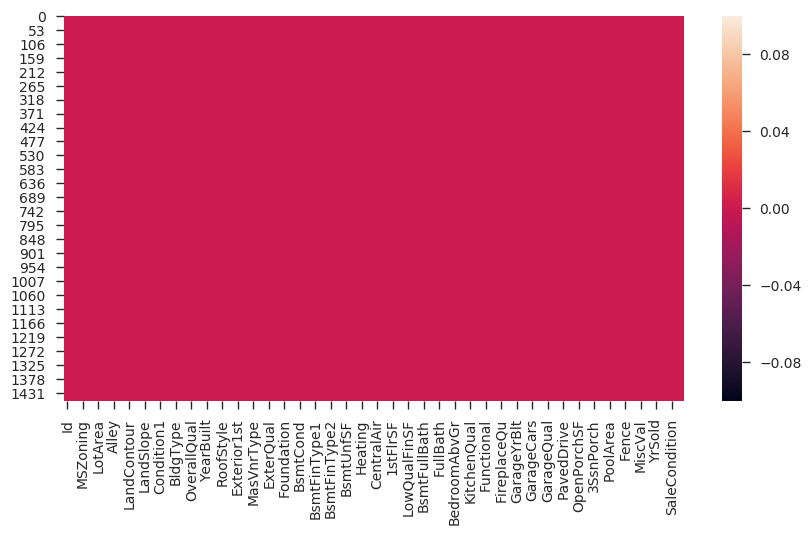

In [109]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(house_data.isnull())

##### From Above heatmap graph Now there is no missing value

In [110]:
corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.017942,-0.073959,0.355879,0.257320,0.817185,-0.036868,0.586570,0.565608,0.430809,0.372023,...,0.334135,0.321053,-0.149050,0.054900,0.121208,0.069798,-0.020021,0.057330,-0.037263,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.700927
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.680625
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.650888


In [111]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

### 4. Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

![image.png](attachment:image.png)

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

###  Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
<img src="https://i.imgur.com/DT4H1Yk.jpg" width="1366" height="768"/> 
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


What elements are present in the diagram?
- The blue dots are the **observed values** of x and y.
- The green line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*4nBp-NeOFGBc-nNzP-VG3w.png" width="1366" height="768"/> 

### Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

### Converting string to number (Encoding)

In [112]:
from sklearn.preprocessing import LabelEncoder
for col in cols:
    lblencod = LabelEncoder() 
    lblencod.fit(list(house_data[col].values)) 
    house_data[col] = lblencod.transform(list(house_data[col].values))

### 4.1 Preparing X and y using pandas

In [113]:
X = house_data.loc[:,house_data.columns!= 'SalePrice'].values
y = house_data['SalePrice'].values

### 4.2 Splitting X and y into training and test datasets.

In [114]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [115]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1168, 79)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 79)
y_test shape:  (292,)


### 4.3 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [116]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [117]:
linreg = linear_reg(X,y)

In [118]:
y_pred_test = linreg.predict(X_test)

<a id=section405></a>

### 4.4 Using the Model for Prediction

In [119]:
y_pred_train = linreg.predict(X_train)  

In [120]:
y_pred_test = linreg.predict(X_test)                                                           # make predictions on the testing set

- We need an evaluation metric in order to compare our predictions with the actual values.

## 5. Model evaluation 

### 5.1 Model Evaluation using __metrics.__

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$



In [121]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [122]:
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 0.14436643126468898


### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [123]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8799120551913316 0.8351623021730071


### 5.3 RMSE Score after Grid Search

In [124]:
linreg = linear_reg(X,y,gridsearch=True)

Mean cross-validated score of the best_estimator :  0.8179311498830668
RMSE for the test set is 0.14436925517599664


In [126]:
print("Accuracy --> ", linreg.score(X_test, y_test)*100)

Accuracy -->  87.99073571321085


### 6 Random Forest Regressor

In [127]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [128]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### 6.1 Model Evaluation using Random Forest 

In [129]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  88.15489841876547
